In [1]:
# Step 1: Data Collection
import pandas as pd

# Load the marketing campaign data from a CSV file
# Replace 'your_data.csv' with the actual file path
data = pd.read_csv('synthetic_marketing_data.csv')

# Display the first few rows of the dataset to understand its structure
print("Data Loaded:")
data.head()


Data Loaded:


,Campaign_Type,Platform,Region,Impressions,Clicks,Conversions,Cost,Revenue,Duration_Days,Ad_Budget
0,advertisement,Google,Europe,7317,672.0,67.0,8294.213955,18165.382680,28.0,18002.828200
1,email,Google,Europe,1526,974.0,36.0,3453.855826,6343.490365,18.0,14393.889120
2,advertisement,Twitter,North America,7748,921.0,89.0,NaN,15730.461730,8.0,15035.802730
3,advertisement,LinkedIn,North America,1405,187.0,24.0,4349.081937,9067.133801,24.0,6894.252089
4,email,Instagram,North America,8986,935.0,44.0,5696.958953,16404.923320,13.0,19186.647460


In [2]:
import numpy as np
# Step 2: Data Cleaning

# Fill missing values only in numeric columns with the median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Handle missing values in non-numeric columns (e.g., fill with a placeholder or drop)
# Example: Fill missing categorical data with 'unknown'
categorical_columns = data.select_dtypes(include=[object, 'category']).columns
data[categorical_columns] = data[categorical_columns].fillna('unknown')

# Ensure data consistency by converting data types if necessary (e.g., date columns)
# Ensure that the 'Date' column exists before converting
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Standardize the data formats (e.g., ensure all campaign types are lowercase)
if 'Campaign_Type' in data.columns:
    data['Campaign_Type'] = data['Campaign_Type'].str.lower()

# Display cleaned data summary
print("Data after Cleaning:")
data.info()


Data after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Campaign_Type  1000 non-null   object 
 1   Platform       1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Impressions    1000 non-null   int64  
 4   Clicks         1000 non-null   float64
 5   Conversions    1000 non-null   float64
 6   Cost           1000 non-null   float64
 7   Revenue        1000 non-null   float64
 8   Duration_Days  1000 non-null   float64
 9   Ad_Budget      1000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


In [3]:
# Step 3: Data Analysis

# Calculate ROI (Return on Investment) for each campaign
data['ROI'] = (data['Revenue'] - data['Cost']) / data['Cost']

# Calculate Cost Per Acquisition (CPA) for each campaign
data['CPA'] = data['Cost'] / data['Conversions']

# Group data by campaign type to compare performance
campaign_performance = data.groupby('Campaign_Type').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Cost': 'sum',
    'Revenue': 'sum',
    'ROI': 'mean',
    'CPA': 'mean'
}).reset_index()

# Identify factors contributing to successful campaigns
# Calculate the average performance metrics across all campaigns
average_metrics = data[['Impressions', 'Clicks', 'Conversions', 'Cost', 'Revenue', 'ROI', 'CPA']].mean()

# Determine successful campaigns based on higher than average ROI and lower than average CPA
successful_campaigns = data[(data['ROI'] > average_metrics['ROI']) & (data['CPA'] < average_metrics['CPA'])]

# Display campaign performance summary
print("Campaign Performance Summary:")
print(campaign_performance)

# Display successful campaigns
print("\nSuccessful Campaigns:")
print(successful_campaigns)

# Identify factors contributing to successful campaigns
# Group successful campaigns by campaign type and analyze key metrics
factors_contributing_to_success = successful_campaigns.groupby('Campaign_Type').agg({
    'Impressions': 'mean',
    'Clicks': 'mean',
    'Conversions': 'mean',
    'Cost': 'mean',
    'Revenue': 'mean',
    'ROI': 'mean',
    'CPA': 'mean'
}).reset_index()

# Display factors contributing to successful campaigns
print("\nFactors Contributing to Successful Campaigns:")
print(factors_contributing_to_success)

Campaign Performance Summary:
   Campaign_Type  Impressions    Clicks  Conversions          Cost  \
0  advertisement      1781457  173141.0      17319.0  1.734266e+06   
1          email      1869611  198774.0      19001.0  1.894111e+06   
2   social_media      1811088  178834.0      18430.0  1.767868e+06   

        Revenue       ROI         CPA  
0  3.966387e+06  2.257450  137.376516  
1  4.443638e+06  2.270023  145.672122  
2  3.991007e+06  2.278900  133.906202  

Successful Campaigns:
     Campaign_Type   Platform         Region  Impressions  Clicks  \
5            email   LinkedIn  North America         4740   306.0   
10   advertisement     Google  North America         9770   220.0   
14    social_media  Instagram         Africa         3394   440.0   
18    social_media    Twitter        unknown         4736   120.0   
22    social_media   LinkedIn         Africa         5378   402.0   
..             ...        ...            ...          ...     ...   
995   social_media    T

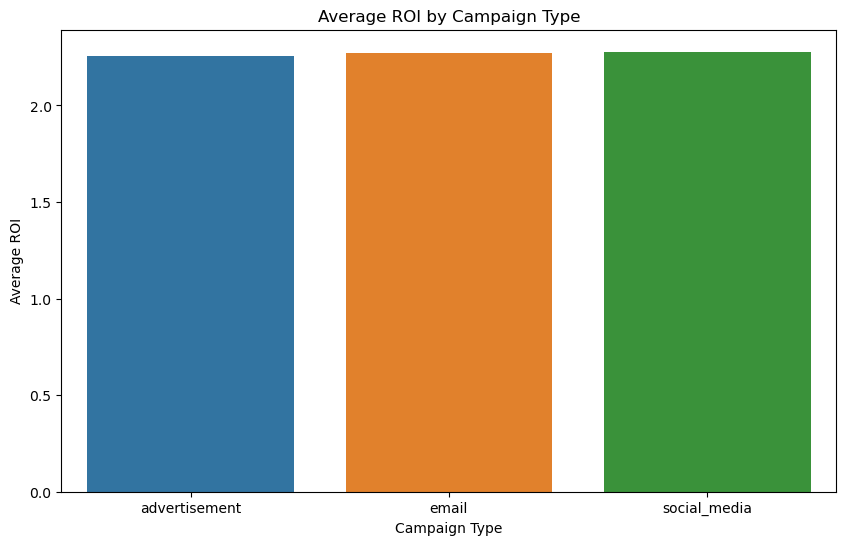

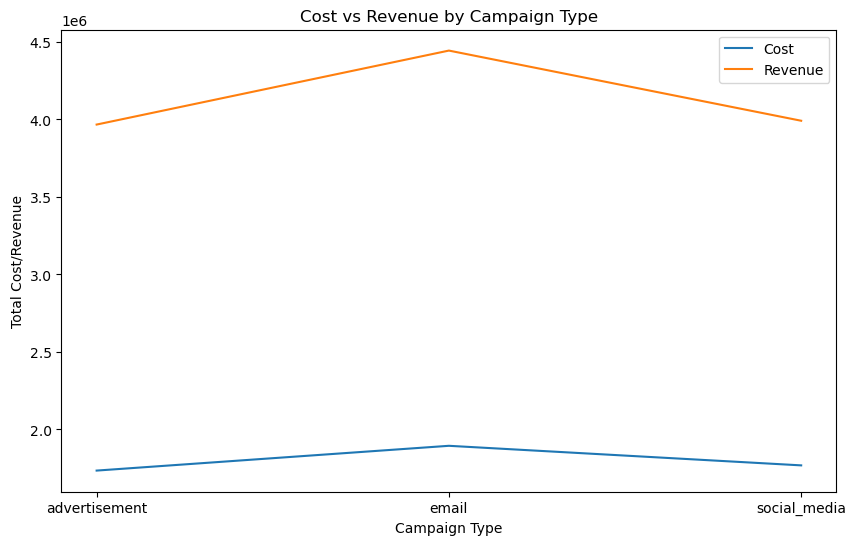

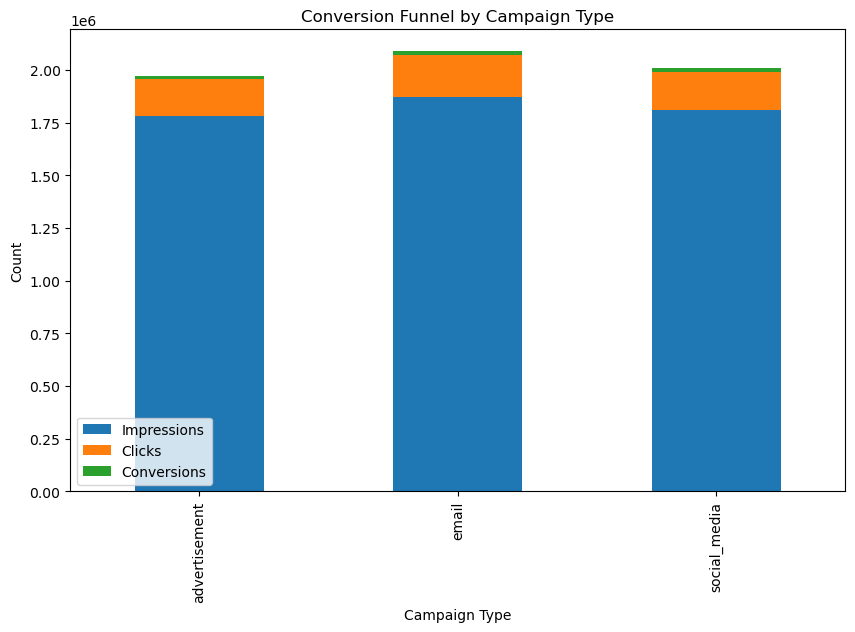

In [4]:
# Step 4: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart of average ROI by campaign type
plt.figure(figsize=(10, 6))
sns.barplot(x='Campaign_Type', y='ROI', data=campaign_performance)
plt.title('Average ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Average ROI')
plt.show()

# Line chart of total cost and revenue by campaign type
plt.figure(figsize=(10, 6))
sns.lineplot(x='Campaign_Type', y='Cost', data=campaign_performance, label='Cost')
sns.lineplot(x='Campaign_Type', y='Revenue', data=campaign_performance, label='Revenue')
plt.title('Cost vs Revenue by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Total Cost/Revenue')
plt.legend()
plt.show()

# Conversion funnel (impressions -> clicks -> conversions) for a specific campaign
funnel_data = data.groupby('Campaign_Type').agg({
    'Impressions': 'sum',
    'Clicks': 'sum',
    'Conversions': 'sum'
}).reset_index()

funnel_data.set_index('Campaign_Type').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Conversion Funnel by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Count')
plt.show()
